In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import os
import glob
import json
import csv
import sys
import numpy as np
import math
import functools
from tqdm import tqdm
import seaborn as sns

In [ ]:
!ls /disk/data/flights_gzip/*.csv.gz | head

In [187]:
df = pd.read_csv('/hot/data/flights/flights_on_time_performance_2009_01.csv', nrows=10)
cleaned_columns = list(map(lambda x: x.lower(), list(df.columns)))

In [206]:
original_columns = list(df.columns)

original_columns

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DEL

In [189]:
original_columns.index('ORIGIN_CITY_NAME')

15

In [190]:
df.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2009        1      1            18            7  2009-01-18   
1  2009        1      1            19            1  2009-01-19   
2  2009        1      1            20            2  2009-01-20   
3  2009        1      1            21            3  2009-01-21   
4  2009        1      1            22            4  2009-01-22   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  ...  \
0                9E                  20363         9E   87099E  ...   
1                9E                  20363         9E   87459E  ...   
2                9E                  20363         9E   89249E  ...   
3                9E                  20363         9E   80259E  ...   
4                9E                  20363         9E   89239E  ...   

   DIV4_TAIL_NUM  DIV5_AIRPORT  DIV5_AIRPORT_ID  DIV5_AIRPORT_SEQ_ID  \
0            NaN           NaN              NaN                  NaN   
1            NaN           NaN              NaN                  NaN   
2            NaN           NaN              NaN                  NaN   
3            NaN           NaN              NaN                  NaN   
4            NaN           NaN              NaN                  NaN   

  DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME  DIV5_WHEELS_OFF  \
0            NaN              NaN                NaN              NaN   
1            NaN              NaN                NaN              NaN   
2            NaN              NaN                NaN              NaN   
3            NaN              NaN                NaN              NaN   
4            NaN              NaN                NaN              NaN   

  DIV5_TAIL_NUM  Unnamed: 109  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  

[5 rows x 110 columns]

In [191]:
output_columns = ['CarrierName', 'CarrierCode', 'FlightNumber',
                   'Day', 'Month', 'Year', 'DayOfWeek',
                   'OriginCity', 'OriginState', 'OriginAirportIATACode', 'OriginLongitude', 'OriginLatitude',
                   'OriginAltitude',
                   'DestCity', 'DestState', 'DestAirportIATACode', 'DestLongitude', 'DestLatitude', 'DestAltitude',
                   'Distance',
                   'CancellationReason', 'Cancelled', 'Diverted', 'CrsArrTime', 'CrsDepTime',
                   'ActualElapsedTime', 'AirTime', 'ArrDelay',
                   'CarrierDelay', 'CrsElapsedTime',
                   'DepDelay', 'LateAircraftDelay', 'NasDelay',
                   'SecurityDelay', 'TaxiIn', 'TaxiOut', 'WeatherDelay',
                   'AirlineYearFounded', 'AirlineYearDefunct']

In [192]:
Sfinal = set(map(lambda x: x.lower(), output_columns))

In [193]:
Sinput = set(map(lambda x: x.replace('_', ''), cleaned_columns))

In [242]:
csvinput_cols = Sinput & Sfinal | {'origincityname', 'destcityname', 
                                   'cancellationcode', 'divreacheddest',
                                   'divactualelapsedtime', 'opuniquecarrier', 'fldate', 'quarter', 'dayofmonth'}

In [243]:
# indices
csvinput_cols

{'actualelapsedtime',
 'airtime',
 'arrdelay',
 'cancellationcode',
 'cancelled',
 'carrierdelay',
 'crsarrtime',
 'crsdeptime',
 'crselapsedtime',
 'dayofmonth',
 'dayofweek',
 'depdelay',
 'destcityname',
 'distance',
 'divactualelapsedtime',
 'diverted',
 'divreacheddest',
 'fldate',
 'lateaircraftdelay',
 'month',
 'nasdelay',
 'opuniquecarrier',
 'origincityname',
 'quarter',
 'securitydelay',
 'taxiin',
 'taxiout',
 'weatherdelay',
 'year'}

In [244]:
normalcols = [name.replace('_', '') for name in cleaned_columns]

In [245]:
relevant_column_pairs = sorted([(name, normalcols.index(name)) for name in csvinput_cols], key=lambda x: x[1])

In [246]:
relevant_columns = [t[0] for t in relevant_column_pairs]
relevant_indices = [t[1] for t in relevant_column_pairs]
relevant_columns, relevant_indices

(['year',
  'quarter',
  'month',
  'dayofmonth',
  'dayofweek',
  'fldate',
  'opuniquecarrier',
  'origincityname',
  'destcityname',
  'crsdeptime',
  'depdelay',
  'taxiout',
  'taxiin',
  'crsarrtime',
  'arrdelay',
  'cancelled',
  'cancellationcode',
  'diverted',
  'crselapsedtime',
  'actualelapsedtime',
  'airtime',
  'distance',
  'carrierdelay',
  'weatherdelay',
  'nasdelay',
  'securitydelay',
  'lateaircraftdelay',
  'divreacheddest',
  'divactualelapsedtime'],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  15,
  24,
  29,
  31,
  36,
  39,
  40,
  42,
  47,
  48,
  49,
  50,
  51,
  52,
  54,
  56,
  57,
  58,
  59,
  60,
  65,
  66])

In [247]:
# generate C++ code for the indices
for name, idx in zip(relevant_columns, relevant_indices):
    print('std::string {} = cells[{}];'.format(name, idx))

std::string year = cells[0];
std::string quarter = cells[1];
std::string month = cells[2];
std::string dayofmonth = cells[3];
std::string dayofweek = cells[4];
std::string fldate = cells[5];
std::string opuniquecarrier = cells[6];
std::string origincityname = cells[15];
std::string destcityname = cells[24];
std::string crsdeptime = cells[29];
std::string depdelay = cells[31];
std::string taxiout = cells[36];
std::string taxiin = cells[39];
std::string crsarrtime = cells[40];
std::string arrdelay = cells[42];
std::string cancelled = cells[47];
std::string cancellationcode = cells[48];
std::string diverted = cells[49];
std::string crselapsedtime = cells[50];
std::string actualelapsedtime = cells[51];
std::string airtime = cells[52];
std::string distance = cells[54];
std::string carrierdelay = cells[56];
std::string weatherdelay = cells[57];
std::string nasdelay = cells[58];
std::string securitydelay = cells[59];
std::string lateaircraftdelay = cells[60];
std::string divreacheddest = cell

In [218]:
# should parse delayed? --> do so if representation is SMALLER than smallest optimized representation that's possible.
# for each column compute statistics

# needs df, df_str
def get_stats(df, df_str):
    stats = []
    for c in df.columns:
        stat = {'name' : c, 'type': str(df[c].dtype)}

        null_count = df[c].isna().count()
        stat['nullable'] = null_count > 0
        stat['nrows'] = len(df[c])
        stat['nnulls'] = null_count
        stat['cardinality'] = len(df[c].unique())

        # csv data from str dataframe!
        stat['csvcellmin'] = df_str[c].str.len().min()
        stat['csvcellmax'] = df_str[c].str.len().max()

        if stat['type'] == 'int64':
            # check min/max
            stat['imin'] = int(df[c].min())
            stat['imax'] = int(df[c].max())

        if stat['type'] == 'float64':
            stat['fmin'] = df[c].min()
            stat['fmax'] = df[c].max()

        stats.append(stat)
    return pd.DataFrame(stats)


In [14]:
optimization_list = ['null_value_optimization', 'i8_range_compression',
                     'i16_range_compression',
                     'i24_range_compression',
                     'i32_range_compression',
                    'range_compression_optimization',
                    'delay_parsing',
                     'constant_encoding',
                    'dict_singlebyte_encoding',
                    'dict_twobyte_encoding',
                    'dict_encoding']

# now for each column, decide which optimization is possible!
def determine_col_optimizations(row, threshold=0.05):
    # NVO?
    # null values form more than 95% of all rows or less than 5% of all optimizations
    null_ratio = row['nnulls'] / row['nrows']
    null_optimization = null_ratio <= threshold or null_ratio >= 1.0 - threshold
    
    opts = {'null_value_optimization' : null_optimization}
    
    # integer range squeeze?
    if not math.isnan(row['imin']) and not math.isnan(row['imax']):
        imax_range = int(row['imax']) - int(row['imin'])
    
        # can we compress to 4 bytes, 2 bytes, 1 byte?
        if imax_range < 2**8:
            opts['i8_range_compression'] = True
        if imax_range < 2**16:
            opts['i16_range_compression'] = True
        if imax_range < 2**24:
            opts['i24_range_compression'] = True
        if imax_range < 2**32:
            opts['i32_range_compression'] = True
            opts['range_compression_optimization'] = True
            
    # check whether cell size is < 7 bytes -> delay parsing!
    # use 7 here to reserve 1 byte for length/flags
    csv_max_cell_size = row['csvcellmax'] - row['csvcellmin'] + 1
    opts['delay_parsing'] = csv_max_cell_size <= 7
        
    # dictionary encoding
    card = row['cardinality']
    max_dict_size = 128000
    if card < 2**8:
        opts['dict_singlebyte_encoding'] = True
    if card < 2**16:
        opts['dict_twobyte_encoding'] = True
    if card <= max_dict_size:
        opts['dict_encoding'] = True
    opts['constant_encoding'] = card == 1
    
    #raise Exception()
    return opts
    

In [69]:
# function to determine how many columns can do each optimization (no details, simple analysis)
def detect_file_specific_optimizations(path, relevant_indices=None, threshold=0.05):
    try:
        df = pd.read_csv(path, usecols=relevant_indices, low_memory=False)
        df_str = pd.read_csv(path, dtype=str, usecols=relevant_indices, low_memory=False)

        df_stats = get_stats(df, df_str)
        df_stats['optimizations'] = df_stats.apply(functools.partial(determine_col_optimizations), axis=1)

        # for each column count how many of each optimizations are available
        df_this_file_opt = pd.DataFrame(list(df_stats['optimizations'].values))
        row = df_this_file_opt.sum().to_dict()
        row['path'] = path
        row['ncolumns'] = len(df.columns)
        row['nrows'] = len(df)

        # add optimization details
        # convert df_stats into detailed overview
        details = df_stats.set_index('name').to_dict('index')

        for k in details.keys():
            # make optimizations flat list
            L = []
            for kk, vv in details[k]['optimizations'].items():
                if vv:
                    L.append(kk)
            L = sorted(L)
            details[k]['optimizations'] = L
            
        # value counts over string values -> can be then used to determine distribution difference!
        for c in df_str.columns:
            details[c]['value_counts'] = df_str[c].value_counts(dropna=False).to_dict()
            
        row['details'] = details
    except Exception as e:
        row = {}
        row['path'] = path
        row['error'] = str(e)
    
    
    
    # general query properties per file
    
    
    # 1. filter query-selectivity (??)
    # in flights the only
#     query_sel = 0.0
#     row['query_sel'] = query_sel
    
    # 2. join query-selectivity (??)

    return row

In [66]:
# compute overall value distribution (i.e. value -> count to determine that!)

In [67]:
path = '/hot/data/flights/flights_on_time_performance_2009_01.csv'
row = detect_file_specific_optimizations(path)

In [68]:
row

{'null_value_optimization': 110,
 'i8_range_compression': 11,
 'i16_range_compression': 19,
 'i24_range_compression': 21,
 'i32_range_compression': 21,
 'range_compression_optimization': 21,
 'delay_parsing': 81,
 'dict_singlebyte_encoding': 74,
 'dict_twobyte_encoding': 110,
 'dict_encoding': 110,
 'constant_encoding': 29,
 'path': '/hot/data/flights/flights_on_time_performance_2009_01.csv',
 'ncolumns': 110,
 'details': {'YEAR': {'type': 'int64',
   'nullable': True,
   'nrows': 532339,
   'nnulls': 532339,
   'cardinality': 1,
   'csvcellmin': 4.0,
   'csvcellmax': 4.0,
   'imin': 2009.0,
   'imax': 2009.0,
   'fmin': nan,
   'fmax': nan,
   'optimizations': ['constant_encoding',
    'delay_parsing',
    'dict_encoding',
    'dict_singlebyte_encoding',
    'dict_twobyte_encoding',
    'i16_range_compression',
    'i24_range_compression',
    'i32_range_compression',
    'i8_range_compression',
    'null_value_optimization',
    'range_compression_optimization'],
   'value_counts': {

In [70]:
# run detection over all files (this might take a while!!!)
# paths = glob.glob('/hot/data/flights/flights_on_time_performance_*.csv')
paths = glob.glob('/disk/data/flights_gzip/*.csv.gz')
paths[:4]

['/disk/data/flights_gzip/flights_on_time_performance_1993_07.csv.gz',
 '/disk/data/flights_gzip/flights_on_time_performance_2014_07.csv.gz',
 '/disk/data/flights_gzip/flights_on_time_performance_2017_07.csv.gz',
 '/disk/data/flights_gzip/flights_on_time_performance_1991_11.csv.gz']

In [71]:
detect_file_specific_optimizations(paths[0])

{'null_value_optimization': 110,
 'i8_range_compression': 10,
 'i16_range_compression': 18,
 'i24_range_compression': 20,
 'i32_range_compression': 20,
 'range_compression_optimization': 20,
 'delay_parsing': 45,
 'dict_singlebyte_encoding': 98,
 'dict_twobyte_encoding': 110,
 'dict_encoding': 110,
 'constant_encoding': 65,
 'path': '/disk/data/flights_gzip/flights_on_time_performance_1993_07.csv.gz',
 'ncolumns': 110,
 'nrows': 436269,
 'details': {'YEAR': {'type': 'int64',
   'nullable': True,
   'nrows': 436269,
   'nnulls': 436269,
   'cardinality': 1,
   'csvcellmin': 4.0,
   'csvcellmax': 4.0,
   'imin': 1993.0,
   'imax': 1993.0,
   'fmin': nan,
   'fmax': nan,
   'optimizations': ['constant_encoding',
    'delay_parsing',
    'dict_encoding',
    'dict_singlebyte_encoding',
    'dict_twobyte_encoding',
    'i16_range_compression',
    'i24_range_compression',
    'i32_range_compression',
    'i8_range_compression',
    'null_value_optimization',
    'range_compression_optimizat

In [72]:
#Import package
from joblib import Parallel, delayed
from joblib import Memory
import time

start = time.time()
results = Parallel(n_jobs=32, verbose=10)(
    delayed(detect_file_specific_optimizations)(path, relevant_indices) for path in paths)
stop = time.time()

print('Elapsed time for the entire processing: {:.2f} s'
      .format(stop - start))

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:   25.0s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:   31.0s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:   42.6s
[Parallel(n_jobs=32)]: Done  49 tasks      | elapsed:   54.9s
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=32)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  1.5min
[Parallel(n_jobs=32)]: Done 117 tasks      | elapsed:  1.8min
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:  2.1min
[Parallel(n_jobs=32)]: Done 157 tasks      | elapsed:  2.3min
[Parallel(n_jobs=32)]: Done 178 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 201 tasks      | elapsed:  2.9min
[Parallel(n_jobs=32)]: Done 224 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 249 tasks      | elapsed:  3.5min
[Parallel(n_jobs=32)]: Done 274 tasks      | elapsed:  

Elapsed time for the entire processing: 338.57 s


[Parallel(n_jobs=32)]: Done 410 out of 410 | elapsed:  5.6min finished


In [73]:
rows = results

In [74]:
# compute also distribution of values per column/file vs. across all files!


In [75]:
# rows = []
# for path in tqdm(paths):
#     row = detect_file_specific_optimizations(path, relevant_indices)
#     rows.append(row)

In [88]:
df_all = pd.DataFrame(rows)
df_all['details'] = df_all['details'].apply(json.dumps)

In [89]:
df_all.to_csv('flights_original_optimizations.csv', index=None)

In [90]:
df_all = pd.read_csv('flights_original_optimizations.csv')

In [91]:
df_all.head(1)

null_value_optimization  i8_range_compression  i16_range_compression  \
0                     20.0                   3.0                    5.0   

   i24_range_compression  i32_range_compression  \
0                    5.0                    5.0   

   range_compression_optimization  delay_parsing  dict_singlebyte_encoding  \
0                             5.0           12.0                      13.0   

   dict_twobyte_encoding  dict_encoding  constant_encoding  \
0                   20.0           20.0               10.0   

                                                path  ncolumns     nrows  \
0  /disk/data/flights_gzip/flights_on_time_perfor...      20.0  436269.0   

                                             details error  
0  {"YEAR": {"type": "int64", "nullable": true, "...   NaN

In [86]:
import ast

In [ ]:
df_all['']

In [137]:
def combine_value_dict(a, b):
    S = set(a.keys()) | set(b.keys())
    S = list(map(str, S))
    d = dict(zip(S, [0] * len(S)))
    for k, v in a.items():
        d[str(k)] += v
        
    for k, v in b.items():
        d[str(k)] += v
    return d


# compute for each value columnt total value counts...
col_dict = {}
# for idx, row in df_all.iterrows():
for row in rows:
    if 'details' not in row.keys() or not row['details']:
        continue
    details = row['details']
    for col in details.keys():
        if not col in col_dict.keys():
            col_dict[col] = {}
        col_dict[col] = combine_value_dict(details[col]['value_counts'], col_dict[col])

In [138]:
col_dict

{'YEAR': {'2001': 5967780,
  '2021': 5443512,
  '2008': 7009726,
  '1990': 5270893,
  '2007': 7455458,
  '1989': 5041200,
  '2005': 7140596,
  '2016': 5617658,
  '1993': 5070501,
  '1988': 5202096,
  '1997': 5411843,
  '2010': 5928308,
  '1992': 5092157,
  '2011': 6085281,
  '1999': 5527884,
  '2002': 5271359,
  '2004': 7129270,
  '2018': 7213446,
  '1996': 5351983,
  '2006': 7141922,
  '2009': 6450285,
  '1995': 5327435,
  '1994': 5180048,
  '2019': 7422037,
  '2015': 5819079,
  '1987': 1311826,
  '2013': 6369482,
  '1998': 5384721,
  '2000': 5683047,
  '2012': 6096762,
  '1991': 5076925,
  '2020': 4688354,
  '2017': 5674621,
  '2003': 6488540,
  '2014': 5819811},
 'MONTH': {'4': 16568437,
  '2': 15447834,
  '5': 16898915,
  '7': 17680436,
  '8': 17715362,
  '12': 16620522,
  '9': 16402552,
  '6': 16965046,
  '11': 16653740,
  '3': 17467905,
  '10': 17489579,
  '1': 16255518},
 'DAY_OF_WEEK': {'4': 29771827,
  '2': 29332630,
  '5': 29824652,
  '6': 25590507,
  '3': 29503262,
  '7': 28

In [139]:
overall_distribution_dict = col_dict

In [140]:
dist_dict = {}
for c in overall_distribution_dict.keys():
    
    col_dist = overall_distribution_dict[c]
    values = np.array(list(col_dist.keys()))
    counts = np.array(list(col_dist.values()))
    idx = np.argsort(values)
    values = values[idx]
    counts = counts[idx]
    
    counts = counts / counts.sum()
    
    # create sorted version for each key
    dist_dict[c] = (values, counts)

In [141]:
cols = list(dist_dict.keys())

In [142]:
dist_dict[cols[10]]

(array(['0.00', '1.00'], dtype='<U4'), array([0.99768582, 0.00231418]))

In [143]:
np.array([0] * len(dist_dict[cols[0]][0]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [149]:
# for each file/column compute euclidean distance to diastirbution
ind_file_dist = {}

for row in rows:
    if 'details' not in row.keys() or not row['details']:
        continue
    details = row['details']
    dist = {}
    
    for col in details.keys():
        col_dist = details[col]['value_counts']
        values = list(dist_dict[col][0])

        counts = np.array([0] * len(values))
        
        # fill in from col dist
        for k, v in col_dist.items():
            idx = values.index(str(k))
            counts[idx] = v
        values = np.array(values)
        counts = counts / counts.sum()

        # create sorted version for each key
        dist[col] = (values, counts)
    
    ind_file_dist[row['path']] = dist

In [151]:
np.linalg.norm

<function numpy.linalg.norm(x, ord=None, axis=None, keepdims=False)>

In [169]:
# compute now for each column distance to overall distribution and plot it out!


file_paths = sorted(list(ind_file_dist.keys()))

def compute_dist_table(file_paths. ignore_nan=True):
    
    rows = []
    # go through
    for path in file_paths:
        row = {}
        row['name'] = os.path.basename(path)
        for col in ind_file_dist[path].keys():
            # for each column get score
            dist_general = dist_dict[col][1]
            dist_specific = ind_file_dist[path][col][1]
            
            # if ignorenan is true, ignore that. Null values differ quite a lot between files -.-
            # yet in how much will this result?
            
            row[col] = np.linalg.norm(dist_general - dist_specific, ord=1)
            
        rows.append(row)
        
    return pd.DataFrame(rows)

df_dist_distance = compute_dist_table(file_paths)
df_dist_distance

SyntaxError: invalid syntax (<ipython-input-169-ed5a7c8c87a4>, line 6)

In [170]:
#@TODO: detect null-value opt for different files?
# do the detected types differ across files? Or is it always the same type?
# important to answer join question etc.


In [159]:
# make an example dist plot for arrival delay
dist_dict['AIR_TIME']

(array(['-1.00', '-10.00', '-100.00', ..., '99.00', '998.00', 'nan'],
       dtype='<U8'),
 array([5.68839902e-07, 1.18714414e-07, 4.94643393e-09, ...,
        4.30626645e-03, 4.94643393e-09, 2.02657797e-01]))

(0.0, 0.1)

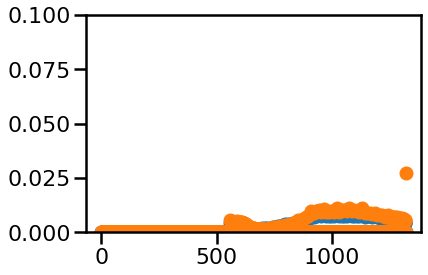

In [168]:
col = 'AIR_TIME'
path = file_paths[150]
general_pct = dist_dict[col][1]
specific_pct = ind_file_dist[path][col][1]
plt.scatter(np.arange(len(general_pct)), general_pct)
plt.scatter(np.arange(len(general_pct)), specific_pct)
plt.ylim(0, 0.1)

In [147]:
for col in details.keys():
    values = list(dist_dict[col][0])
    print(col)
    print(values)
    

YEAR
['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
MONTH
['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
DAY_OF_WEEK
['1', '2', '3', '4', '5', '6', '7']
CRS_DEP_TIME
['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112'

In [110]:
X = np.array(['b', 'a', 'c'])
idx = np.argsort(X)
X[idx]

array(['a', 'b', 'c'], dtype='<U1')

In [ ]:
# now compute for each file/column distance to ground distribution

In [ ]:
row

In [39]:
df_all['error'].dropna()

389    Usecols do not match columns, columns expected...
Name: error, dtype: object

In [40]:
df_opt = df_all.copy()

In [41]:
# what are all the columns for each optimization? Do they differ between files?
# if not, then stable behavior across files!
# => bad for hyperspecialization...
opt_dict = {name : [] for name in optimization_list}
# accumulate columns for which this optimization holds
for idx, row in df_opt.iterrows():
    if not isinstance(row['details'], dict):
        continue
    
    for k, v in row['details'].items():
        for name in v['optimizations']:
            opt_dict[name].append(k)

opt_dict = {k : sorted(list(set(v))) for k, v in opt_dict.items()}
#df_col_overview = pd.DataFrame(opt_dict)
pd.DataFrame([{'name' : k, 'noptimizations' : len(v), 'optimizations' : v} for k,v in opt_dict.items()])

name  noptimizations  \
0          null_value_optimization              20   
1             i8_range_compression               3   
2            i16_range_compression               5   
3            i24_range_compression               5   
4            i32_range_compression               5   
5   range_compression_optimization               5   
6                    delay_parsing              20   
7                constant_encoding              10   
8         dict_singlebyte_encoding              13   
9            dict_twobyte_encoding              20   
10                   dict_encoding              20   

                                        optimizations  
0   [ACTUAL_ELAPSED_TIME, AIR_TIME, ARR_DELAY, CAN...  
1                          [DAY_OF_WEEK, MONTH, YEAR]  
2   [CRS_ARR_TIME, CRS_DEP_TIME, DAY_OF_WEEK, MONT...  
3   [CRS_ARR_TIME, CRS_DEP_TIME, DAY_OF_WEEK, MONT...  
4   [CRS_ARR_TIME, CRS_DEP_TIME, DAY_OF_WEEK, MONT...  
5   [CRS_ARR_TIME, CRS_DEP_TIME, DAY_OF_WEEK, MONT...  
6   [ACTUAL_ELAPSED_TIME, AIR_TIME, ARR_DELAY, CAN...  
7   [AIR_TIME, CARRIER_DELAY, LATE_AIRCRAFT_DELAY,...  
8   [AIR_TIME, CANCELLED, CARRIER_DELAY, DAY_OF_WE...  
9   [ACTUAL_ELAPSED_TIME, AIR_TIME, ARR_DELAY, CAN...  
10  [ACTUAL_ELAPSED_TIME, AIR_TIME, ARR_DELAY, CAN...

In [42]:
optimization_list

['null_value_optimization',
 'i8_range_compression',
 'i16_range_compression',
 'i24_range_compression',
 'i32_range_compression',
 'range_compression_optimization',
 'delay_parsing',
 'constant_encoding',
 'dict_singlebyte_encoding',
 'dict_twobyte_encoding',
 'dict_encoding']

Plot figure out of specialization across files

In [43]:
df_opt = df_opt.sort_values(by='path').reset_index(drop=True)

In [44]:
# plot how many files could have optimizations!
#name = os.path.basename(path)

names = ['FULLY SPECIALIZED'] + list(df_opt.path.apply(os.path.basename).values)
n_names = len(names)

n_opts = len(optimization_list)

count_matrix = np.zeros((n_names, n_opts)) * np.nan
n_columns = df_opt.iloc[0]['ncolumns']


# fill in first row with ncolumns
count_matrix[0, :] = n_columns

# fill in from rows
for idx, row in df_opt.iterrows():
    row = row.to_dict()
    for key, value in row.items():
        if key in optimization_list:
            j = optimization_list.index(key)
            count_matrix[idx + 1, j] = value
count_matrix.shape

(411, 11)

In [45]:
sns.set_context('poster')

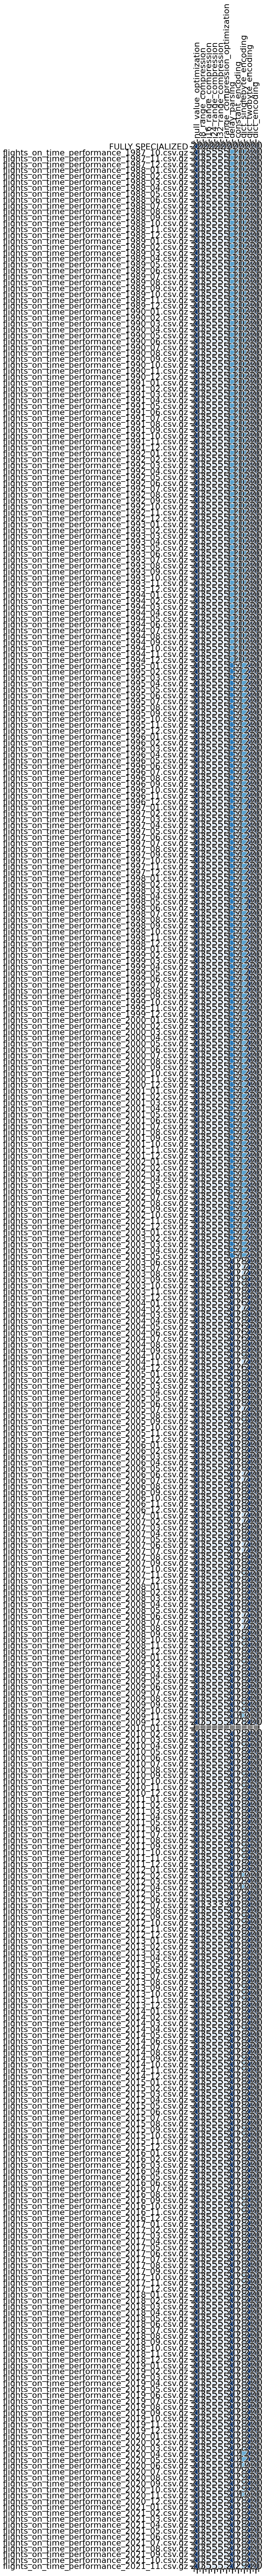

In [46]:
import copy
fig, ax = plt.subplots(figsize=(10, 120))

min_val, max_val = 0, len(df.columns)

cmap = copy.copy(plt.cm.get_cmap("Blues"))
cmap.set_bad('gray',1.)
ax.matshow(count_matrix, cmap=cmap)

for i in range(count_matrix.shape[1]):
    for j in range(count_matrix.shape[0]):
        c = count_matrix[j,i]
        if not math.isnan(c):
            txt = ax.text(i, j, str(int(c)), va='center', ha='center', fontsize=28)
            # cf. https://osxastrotricks.wordpress.com/2014/12/02/add-border-around-text-with-matplotlib/
            txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])
# ticks are names of files

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, n_opts, 1))
ax.set_yticks(np.arange(0, n_names, 1))

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, n_opts + 1, 1))
ax.set_xticklabels(optimization_list, rotation = 90)
# ax.set_yticklabels(np.arange(1, n_names + 1, 1))
ax.set_yticklabels(names)

# Minor ticks
ax.set_xticks(np.arange(-.5, n_opts, 1), minor=True)
ax.set_yticks(np.arange(-.5, n_names, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.savefig('flights_detailed_opts.png', dpi=120, transparent=True)

In [47]:
# what's the most frequent row/optimization counts?

In [48]:
count_matrix.shape

(411, 11)

In [49]:
count_matrix[1:, :].shape

(410, 11)

In [50]:
count_matrix.shape

(411, 11)

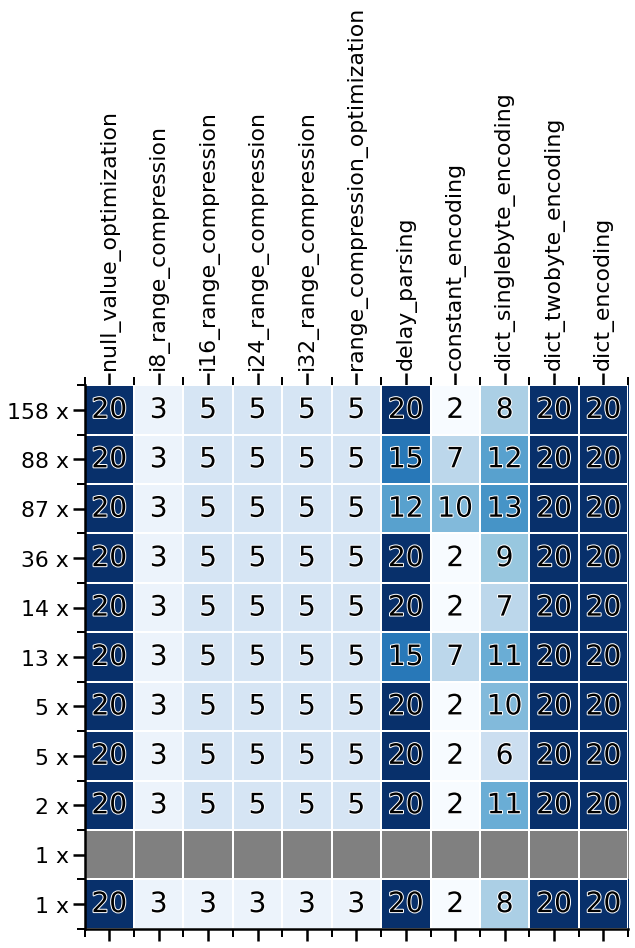

In [52]:
# get counts, drop the first row
unique_rows, counts = np.unique(count_matrix[1:, :], axis=0, return_counts=True)
unique_rows, counts

sort_idx = np.argsort(counts)[::-1]
counts = counts[sort_idx]
unique_rows = unique_rows[sort_idx, :]

# plot again out, this time with counts

fig, ax = plt.subplots(figsize=(20, 10))
min_val, max_val = 0, len(df.columns)

cmap = copy.copy(plt.cm.get_cmap("Blues"))
cmap.set_bad('gray',1.)
ax.matshow(unique_rows, cmap=cmap)

for i in range(unique_rows.shape[1]):
    for j in range(unique_rows.shape[0]):
        c = unique_rows[j,i]
        if not math.isnan(c):
            txt = ax.text(i, j, str(int(c)), va='center', ha='center', fontsize=28)
            # cf. https://osxastrotricks.wordpress.com/2014/12/02/add-border-around-text-with-matplotlib/
            txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])
# ticks are how often each combo occurs

combos = ['{} x'.format(c) for c in counts]
n_combos = len(combos)
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, n_opts, 1))
ax.set_yticks(np.arange(0, n_combos, 1))

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, n_opts + 1, 1))
ax.set_xticklabels(optimization_list, rotation = 90)
# ax.set_yticklabels(np.arange(1, n_names + 1, 1))
ax.set_yticklabels(combos)

# Minor ticks
ax.set_xticks(np.arange(-.5, n_opts, 1), minor=True)
ax.set_yticks(np.arange(-.5, n_combos, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
sns.despine()

plt.savefig('flights_agg_opts.png', dpi=120, transparent=True)

Notes:
    
    
--> probabilistic checking approach? I.e., allow up to a certain number of rows to violate optimization constraint.
--> check older flight files
--> check github files.

In [ ]:
# which variables can be dict encoded? which i8 range encoded?

As for the queries, only queries with Joins/Aggregates will benefit from it, because
the aggregation over narrowed types may be faster (vectorization!)
for joins, the buckets will be smaller & the amount of data to write out as intermediate is smaller.


Other effect for file -> file query is merely when data is passed "through", i.e. no data -> parse -> data cycle.


Main issue for hyperspecialization workload: Need to find dataset where data between individual buckets varies significantly! I.e., by reordering data or so!

Test, what about if data is repartitioned by other variable than year?

=> partition after carrier!

To repartition, run following in Spark shell
```
val df= spark.read.option("header", "true").csv("/hot/data/flights/flights_on_time_performance_*.csv")
import spark.implicits._
df.repartition($"OP_CARRIER_AIRLINE_ID").write.mode("overwrite").partitionBy("OP_CARRIER_AIRLINE_ID").format("csv").option("header", "true").save("/hot/scratch/hyperspecialization/partitioned_flights")
```

In [ ]:
!ls /hot/scratch/hyperspecialization/partitioned_flights/'OP_CARRIER_AIRLINE_ID=19386' 

run the above code again, to detect what's going on

In [ ]:
paths = glob.glob('/hot/scratch/hyperspecialization/partitioned_flights/*/*.csv')
len(paths)

In [ ]:
start = time.time()
results = Parallel(n_jobs=32, verbose=10)(
    delayed(detect_file_specific_optimizations)(path, relevant_indices) for path in paths)
stop = time.time()

print('Elapsed time for the entire processing: {:.2f} s'
      .format(stop - start))

In [ ]:
df_opt = pd.DataFrame(results)
df_opt = df_opt.sort_values(by='path').reset_index(drop=True)
df_opt.head()

In [ ]:
name = df_opt.iloc[0].path

def normalize_name(path):
    return path[path.find('flights/')+len('flights/'):path.rfind('/')]
normalize_name(name)

In [ ]:
# plot how many files could have optimizations!
names = ['FULLY SPECIALIZED'] + list(df_opt.path.apply(normalize_name).values)
n_names = len(names)

n_opts = len(optimization_list)

count_matrix = np.zeros((n_names, n_opts)) * np.nan
n_columns = df_opt.iloc[0]['ncolumns']


# fill in first row with ncolumns
count_matrix[0, :] = n_columns

# fill in from rows
for idx, row in df_opt.iterrows():
    row = row.to_dict()
    for key, value in row.items():
        if key in optimization_list:
            j = optimization_list.index(key)
            count_matrix[idx + 1, j] = value
count_matrix.shape

In [ ]:
# do again the specialization plot

In [ ]:
import copy
fig, ax = plt.subplots(figsize=(10, 120))

min_val, max_val = 0, len(df.columns)

cmap = copy.copy(plt.cm.get_cmap("Blues"))
cmap.set_bad('gray',1.)
ax.matshow(count_matrix, cmap=cmap)

for i in range(count_matrix.shape[1]):
    for j in range(count_matrix.shape[0]):
        c = count_matrix[j,i]
        if not math.isnan(c):
            txt = ax.text(i, j, str(int(c)), va='center', ha='center', fontsize=28)
            # cf. https://osxastrotricks.wordpress.com/2014/12/02/add-border-around-text-with-matplotlib/
            txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])
# ticks are names of files

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, n_opts, 1))
ax.set_yticks(np.arange(0, n_names, 1))

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, n_opts + 1, 1))
ax.set_xticklabels(optimization_list, rotation = 90)
# ax.set_yticklabels(np.arange(1, n_names + 1, 1))
ax.set_yticklabels(names)

# Minor ticks
ax.set_xticks(np.arange(-.5, n_opts, 1), minor=True)
ax.set_yticks(np.arange(-.5, n_names, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

In [ ]:
# get counts, drop the first row
unique_rows, counts = np.unique(count_matrix[1:, :], axis=0, return_counts=True)
unique_rows, counts

sort_idx = np.argsort(counts)[::-1]
counts = counts[sort_idx]
unique_rows = unique_rows[sort_idx, :]

# plot again out, this time with counts

fig, ax = plt.subplots(figsize=(10, 5))
min_val, max_val = 0, len(df.columns)

cmap = copy.copy(plt.cm.get_cmap("Blues"))
cmap.set_bad('gray',1.)
ax.matshow(unique_rows, cmap=cmap)

for i in range(unique_rows.shape[1]):
    for j in range(unique_rows.shape[0]):
        c = unique_rows[j,i]
        if not math.isnan(c):
            txt = ax.text(i, j, str(int(c)), va='center', ha='center', fontsize=28)
            # cf. https://osxastrotricks.wordpress.com/2014/12/02/add-border-around-text-with-matplotlib/
            txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])
# ticks are how often each combo occurs

combos = ['{} x'.format(c) for c in counts]
n_combos = len(combos)
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, n_opts, 1))
ax.set_yticks(np.arange(0, n_combos, 1))

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, n_opts + 1, 1))
ax.set_xticklabels(optimization_list, rotation = 90)
# ax.set_yticklabels(np.arange(1, n_names + 1, 1))
ax.set_yticklabels(combos)

# Minor ticks
ax.set_xticks(np.arange(-.5, n_opts, 1), minor=True)
ax.set_yticks(np.arange(-.5, n_combos, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

I.e. trick here could be to use some aggregateByKey statistic (vectorized!) where the aggByKey is one of the columns where dcy_singlebyte_encoding changes. If we're lucky it's a meaningful column!

Note: This tool above can be also used quite well to determine the specialization potential for some partitioned
      dataset.
      I.e., investigate maybe original 311 requests etc.

Note:

The above is not really helpful. What we really want is already select the best optimization/encoding for each column!

==> That's an optimizer problem.

We also need to know how much effect it has to have certain combos.


Need to craft queries where this matters...



Note: For Github/JSON dataset this analysis might be even more helpful. I.e., flatten out JSON doc!

In [ ]:
df_opt.to_csv('flights_repartitioned_optimizations.csv', index=None)

In [ ]:
path = '/hot/data/311/311_2010_to_2020.csv'
ans = detect_file_specific_optimizations(path)

In [ ]:
ans

In [ ]:

path = '/hot/data/flights/flights_on_time_performance_2019_12.csv'

df = pd.read_csv(path, usecols=relevant_indices, low_memory=False)
df_str = pd.read_csv(path, dtype=str, usecols=relevant_indices, low_memory=False)

df_stats = get_stats(df, df_str)
df_stats['optimizations'] = df_stats.apply(functools.partial(determine_col_optimizations), axis=1)

# for each column count how many of each optimizations are available
df_this_file_opt = pd.DataFrame(list(df_stats['optimizations'].values))
row = df_this_file_opt.sum().to_dict()
row['path'] = path
row['ncolumns'] = len(df.columns)

In [ ]:
details

In [ ]:
df.columns

In [ ]:
masked_array = np.ma.array (a, mask=np.isnan(a))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
ax.imshow(masked_array, interpolation='nearest', cmap=cmap)

In [ ]:
fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(15):
    for j in range(15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

In [ ]:
# filter specialization for each file!!!

# could write benchmark with two numbers -> parse, then specialize!